## lightsheet_overview_stats_Oct2020
The purpose of this notebook is to make plots of the usage of the core facility/light-sheet microscope highlighting different use cases and labs

In [1]:
import pandas as pd
import numpy as np
import datajoint as dj
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
dj.config['database.host'] = 'datajoint00.pni.princeton.edu'
dj.conn()

Please enter DataJoint username: ahoag
Please enter DataJoint password: ········
Connecting ahoag@datajoint00.pni.princeton.edu:3306


DataJoint connection (connected) ahoag@datajoint00.pni.princeton.edu:3306

In [3]:
db_lightsheet = dj.create_virtual_module('u19lightserv_lightsheet','u19lightserv_lightsheet')

In [7]:
request_contents = db_lightsheet.Request()
sample_contents = db_lightsheet.Request.Sample()
joined_contents = request_contents*sample_contents
frame = pd.DataFrame(request_contents.fetch())

In [8]:
frame['labname_cap']=frame['labname'].apply(lambda x: x[0].upper() + x[1:])

In [17]:
braincogs_labs = ["Wang","Witten","Brody","Tank","Goldman","Seung","Pillow"]
def braincogsize_labs(labname):
    """ Function to apply to a pandas column to separate out non-braincogs labs """
    for lab in braincogs_labs:
        if lab in labname:
            return lab
    else:
        return "Non-BRAINCoGS\n labs"

In [18]:
frame['braincogs_lab'] = frame['labname_cap'].apply(braincogsize_labs)

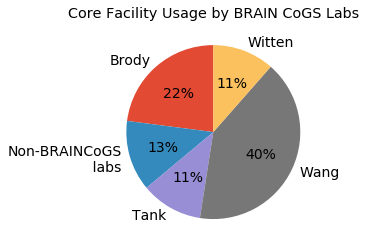

In [25]:
# Make pie plot of lab usage
series=pd.Series(frame.groupby(['braincogs_lab'])['braincogs_lab'].count(),name='')
total = len(frame)
colors=''
# ax = series.plot(kind='pie',autopct=lambda p: '{:.0f}'.format(p * total / 100),
#                startangle=90,fontsize=14)
ax = series.plot(kind='pie',autopct='%i%%',
               startangle=90,fontsize=14)
fig = ax.get_figure()
ax.set_title("Core Facility Usage by BRAIN CoGS Labs")
fig.savefig('Braincogs_lab_usage.png',format='png')

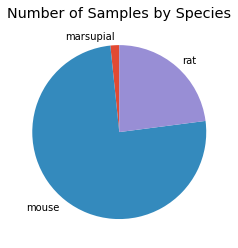

In [20]:
# species breakdown
series=pd.Series(frame.groupby(['species'])['species'].count(),name='')
total = len(frame)
colors=''
ax = series.plot(kind='pie',autopct=lambda p: '{:.0f}'.format(p * total / 100),
               startangle=90)
fig = ax.get_figure()
ax.set_title("Number of Samples by Species")
fig.savefig('Braincogs_species_usage.png',format='png')